In [2]:
#importing libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading the csv file
train = pd.read_csv('C:/Users/Himanshu Kumar/Downloads/train_qnU1GcL.csv')

In [4]:
train.shape

(79853, 12)

In [5]:
train.head()

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
0  110936                             0.429        12058  355060   
1   41492                             0.010        21546  315150   
2   31300                             0.917        17531   84140   
3   19415                             0.049        15341  250510   
4   99379                             0.052        31400  198680   

   Count_3-6_months_late  Count_6-12_months_late  \
0                    0.0                     0.0   
1                    0.0                     0.0   
2                    2.0                     3.0   
3                    0.0                     0.0   
4                    0.0                     0.0   

   Count_more_than_12_months_late  application_underwriting_score  \
0                             0.0                           99.02   
1                             0.0                           99.89   
2                             1.0                           98.69   
3                             0.0                           99.57   
4                             0.0                           99.87   

   no_of_premiums_paid sourcing_channel residence_area_type  target  
0                   13                C               Urban       1  
1                   21                A               Urban       1  
2                    7                C               Rural       0  
3                    9                A               Urban       1  
4                   12                B               Urban       1

In [6]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [7]:
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [8]:
import seaborn as sn
import calendar
from datetime import datetime
from datetime import date

corelation between all the numerical variables

In [9]:
corr = train[['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid','target']].corr()

<AxesSubplot:>

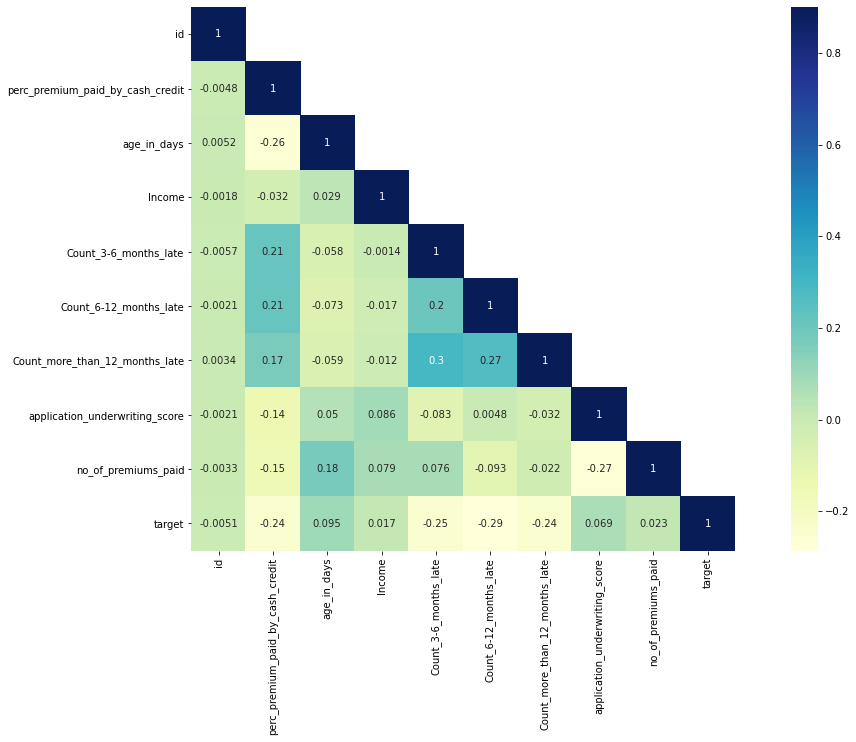

In [10]:
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask = mask, vmax= .9, square = True, annot = True, cmap = "YlGnBu")

C:\Users\Himanshu Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

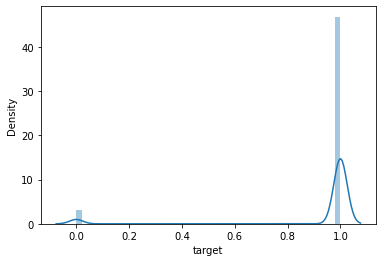

In [11]:
# distribution of count variable
sn.distplot(train["target"])

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

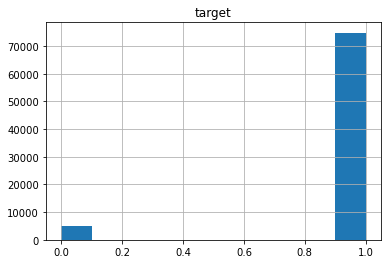

In [12]:
train.hist(column='target')

array([[<AxesSubplot:title={'center':'age_in_days'}>]], dtype=object)

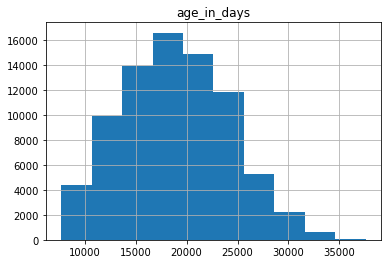

In [13]:
train.hist(column='age_in_days')

In [14]:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [15]:
train.fillna(0, inplace = True)

In [16]:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

# Applying ML Algorithm

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
l_model = LogisticRegression()

In [19]:
train = train.drop('sourcing_channel',axis = 1)

In [20]:
X_train = train[train['age_in_days']<=28000]
val = train[train['age_in_days']>28000]

In [21]:
X_train = train.drop('target',1)
y_train = train['target']
X_val = val.drop('target',1)
y_val = val['target']

checking the shape of the X_train, y_train, X_val and y_val

In [22]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((79853, 10), (3927, 10), (79853,), (3927,))

In [23]:
X_train=pd.get_dummies(X_train)
X_val=pd.get_dummies(X_val)

# Fitting the model on X_train and y_train

In [24]:
l_model.fit(X_train,y_train)

LogisticRegression()

In [25]:
# making prediction on validation set
prediction = l_model.predict(X_val)

In [26]:
prediction.shape, X_train.shape, y_train.shape, X_val.shape, y_val.shape

((3927,), (79853, 11), (79853,), (3927, 11), (3927,))

# defining a function which will return the rmsle score

In [27]:
def rmsle(y, y_):
    loga = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    logb = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calculation = (loga - logb) ** 2
    return np.sqrt(np.mean(calculation))

In [28]:
rmsle(y_val,prediction)

0.1043494138107556

In [29]:
l_model.score(X_train,y_train)

0.937409990858202

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
dt_reg = DecisionTreeRegressor(max_depth=7,min_samples_leaf=4)

In [32]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=4)

In [33]:
pred = dt_reg.predict(X_val)

Now calculating the rmsle of the predicted values

In [34]:
rmsle(y_val, pred)

0.09285572658636894

# Similar approach on test data

In [35]:
test= pd.read_csv('C:/Users/Himanshu Kumar/Downloads/test__Szvtp7B_KytlNBf_48WC0Kd_OiVPtdp_ceb0kKC.csv')

In [36]:
test.shape

(34224, 11)

In [37]:
test.head()

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
0    649                             0.001        27384   51150   
1  81136                             0.124        23735  285140   
2  70762                             1.000        17170  186030   
3  53935                             0.198        16068  123540   
4  15476                             0.041        10591  200020   

   Count_3-6_months_late  Count_6-12_months_late  \
0                    0.0                     0.0   
1                    0.0                     0.0   
2                    0.0                     0.0   
3                    0.0                     0.0   
4                    1.0                     0.0   

   Count_more_than_12_months_late  application_underwriting_score  \
0                             0.0                           99.89   
1                             0.0                           98.93   
2                             0.0                             NaN   
3                             0.0                           99.00   
4                             0.0                           99.17   

   no_of_premiums_paid sourcing_channel residence_area_type  
0                    7                A               Rural  
1                   19                A               Urban  
2                    2                B               Urban  
3                   11                B               Rural  
4                   14                A               Rural

In [38]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [39]:
test.fillna(0, inplace = True)

In [40]:
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

In [41]:
test=test.drop('sourcing_channel',axis=1)

In [42]:
test.head()

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
0    649                             0.001        27384   51150   
1  81136                             0.124        23735  285140   
2  70762                             1.000        17170  186030   
3  53935                             0.198        16068  123540   
4  15476                             0.041        10591  200020   

   Count_3-6_months_late  Count_6-12_months_late  \
0                    0.0                     0.0   
1                    0.0                     0.0   
2                    0.0                     0.0   
3                    0.0                     0.0   
4                    1.0                     0.0   

   Count_more_than_12_months_late  application_underwriting_score  \
0                             0.0                           99.89   
1                             0.0                           98.93   
2                             0.0                            0.00   
3                             0.0                           99.00   
4                             0.0                           99.17   

   no_of_premiums_paid residence_area_type  
0                    7               Rural  
1                   19               Urban  
2                    2               Urban  
3                   11               Rural  
4                   14               Rural

In [49]:
test_prediction = dt_reg.predict(test)

In [44]:
dummy = pd.get_dummies(test['residence_area_type'])

In [45]:
dummy.head()

Rural  Urban
0      1      0
1      0      1
2      0      1
3      1      0
4      1      0

In [46]:
df = pd.concat((test,dummy),axis=1)

In [47]:
df.head()

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
0    649                             0.001        27384   51150   
1  81136                             0.124        23735  285140   
2  70762                             1.000        17170  186030   
3  53935                             0.198        16068  123540   
4  15476                             0.041        10591  200020   

   Count_3-6_months_late  Count_6-12_months_late  \
0                    0.0                     0.0   
1                    0.0                     0.0   
2                    0.0                     0.0   
3                    0.0                     0.0   
4                    1.0                     0.0   

   Count_more_than_12_months_late  application_underwriting_score  \
0                             0.0                           99.89   
1                             0.0                           98.93   
2                             0.0                            0.00   
3                             0.0                           99.00   
4                             0.0                           99.17   

   no_of_premiums_paid residence_area_type  Rural  Urban  
0                    7               Rural      1      0  
1                   19               Urban      0      1  
2                    2               Urban      0      1  
3                   11               Rural      1      0  
4                   14               Rural      1      0

In [48]:
test= df.drop(['residence_area_type'],axis=1)

In [50]:
test= pd.get_dummies(test)

In [51]:
t = pd.DataFrame()

In [52]:
# creating a count column and saving the predictions in it
t['target'] = test_prediction

In [53]:
t.to_csv('sample_submission_ger7W7I', header=True, index=False)

In [54]:
dt_reg.score(X_train, y_train)

0.19554918962662993